In [570]:
# import tool set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [571]:
# Get data from Excel
df = pd.read_excel('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data.xls')

In [572]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [573]:
# Export as csv
df.to_csv('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data_new.csv')

In [574]:
# Get information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

#### What data should be dropped before normalisation and regression?

Columns:
* ID
* date
* lat
* long
* waterfront

In [575]:
# Get an overview of the distribution of prices
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [576]:
for column in df:
    print(column.upper())
    print(df[column].value_counts())
    print()

ID
795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

DATE
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

BEDROOMS
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

BATHROOMS
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75    

In [577]:
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

## Identify outliers

By plotting the coordinates of the properties on a map (via Tableau), it was discovered that a number of properties lie hundreds of kilometers away from the area in which the vast majority of the data is concentrated. It was also discovered that approx. 120 properties are located on an island only accessible by ferry. Since the setting of these properties is markedly different from the others in the data set, it was decided to exclude these properties by excluding Zip Codes 98070 ( Vashon and Maury Island), 98045 and 98065 as well as properties located East of -121.7 degrees longitude

In [578]:
# Drop properties on islands and far outside central dataset
zips = [98070, 98045, 98065]
for code in zips:
    df.drop(df[df.zipcode == code].index, inplace=True)

df.drop(df[df.long > -121.7].index, inplace=True)

In [579]:
# Drop property with 33 bedrooms
df.drop(df[df.bedrooms == 33].index, inplace=True)

In [580]:
# Reset index
df.reset_index(drop=True, inplace=True)

## Import King County crime statistics

In [581]:
# Import crime statistics
df_crime = pd.read_csv('/Users/arnet/Desktop/Ironhack/Week5_Project/KCSO_Incident_Dataset__Historic_to_2019.csv')

In [582]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   case_number              20449 non-null  object
 1   incident_datetime        20449 non-null  object
 2   incident_type            20449 non-null  object
 3   FCR                      20449 non-null  int64 
 4   address_1                20449 non-null  object
 5   city                     20449 non-null  object
 6   state                    20449 non-null  object
 7   zip                      20133 non-null  object
 8   created_at               20449 non-null  object
 9   updated_at               20449 non-null  object
 10  hour_of_day              20449 non-null  int64 
 11  day_of_week              20449 non-null  object
 12  Incident Block Location  17713 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [583]:
df_crime.isna().sum()

case_number                   0
incident_datetime             0
incident_type                 0
FCR                           0
address_1                     0
city                          0
state                         0
zip                         316
created_at                    0
updated_at                    0
hour_of_day                   0
day_of_week                   0
Incident Block Location    2736
dtype: int64

In [584]:
# Drop nulls
df_crime.dropna(inplace=True)
df_crime.reset_index(drop=True, inplace=True)

In [585]:
# Export clean df to csv to use in Tableau
df_crime.to_csv('/Users/arnet/Desktop/Ironhack/Week5_Project/king_county_crime_data.csv')

## Add other datasets / calculated fields

#### Calculated fields
* Bins concerning housing prices
* Distance from downtown Seattle
* Distance from Metro Station
* Distance from top 5 employers

In [586]:
# Do calculations here

## Split columns into numerical and categorical values

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20934 entries, 0 to 20933
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20934 non-null  int64         
 1   date           20934 non-null  datetime64[ns]
 2   bedrooms       20934 non-null  int64         
 3   bathrooms      20934 non-null  float64       
 4   sqft_living    20934 non-null  int64         
 5   sqft_lot       20934 non-null  int64         
 6   floors         20934 non-null  float64       
 7   waterfront     20934 non-null  int64         
 8   view           20934 non-null  int64         
 9   condition      20934 non-null  int64         
 10  grade          20934 non-null  int64         
 11  sqft_above     20934 non-null  int64         
 12  sqft_basement  20934 non-null  int64         
 13  yr_built       20934 non-null  int64         
 14  yr_renovated   20934 non-null  int64         
 15  zipcode        2093

### Drop columns which are not used for regression

In [588]:
df_trimmed = df.drop(['id', 'date', 'lat', 'long', 'waterfront'], axis= 1)

### Determine categorical data
Based on research, ordinal data such as condition, grade and view can be treated either as numerical or as categorical data. In order to find the best model to predict housing prices, we will test both.

In Model 1, categorical data will only include zipcode. 
In Model 2, categorical data will include view, condition, grade and zipcode.

Note: Ordinal data are discrete integers that can be ranked or sorted. A defining characteristic is that the distance between any two numbers is not known. (Source: https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689)

#### Model 1

In [589]:
# Model 1 - Convert zip code to object type
df_m1 = df_trimmed
df_m1['zipcode'] = df_m1['zipcode'].astype('object')
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20934 entries, 0 to 20933
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       20934 non-null  int64  
 1   bathrooms      20934 non-null  float64
 2   sqft_living    20934 non-null  int64  
 3   sqft_lot       20934 non-null  int64  
 4   floors         20934 non-null  float64
 5   view           20934 non-null  int64  
 6   condition      20934 non-null  int64  
 7   grade          20934 non-null  int64  
 8   sqft_above     20934 non-null  int64  
 9   sqft_basement  20934 non-null  int64  
 10  yr_built       20934 non-null  int64  
 11  yr_renovated   20934 non-null  int64  
 12  zipcode        20934 non-null  object 
 13  sqft_living15  20934 non-null  int64  
 14  sqft_lot15     20934 non-null  int64  
 15  price          20934 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 2.6+ MB


In [590]:
categorical_m1 = df_m1.select_dtypes(include = 'object')
print(categorical_m1)

      zipcode
0       98178
1       98125
2       98028
3       98136
4       98074
...       ...
20929   98103
20930   98146
20931   98144
20932   98027
20933   98144

[20934 rows x 1 columns]


In [591]:
# Convert to binary
categorical_m1 = pd.get_dummies(categorical_m1, 
               drop_first = True)
categorical_m1

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20930,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model 2

In [592]:
# Model 2 - Convert columns with ordinal / categorical data to object type
df_m2 = df_trimmed
columns = ['view', 'condition', 'grade', 'zipcode']
for column in columns:
    df_m2[column] = df_m2[column].astype('object')

In [593]:
categorical_m2 = df_m2.select_dtypes(include = 'object')
print(categorical_m2)

      view condition grade zipcode
0        0         3     7   98178
1        0         3     7   98125
2        0         3     6   98028
3        0         5     7   98136
4        0         3     8   98074
...    ...       ...   ...     ...
20929    0         3     8   98103
20930    0         3     8   98146
20931    0         3     7   98144
20932    0         3     8   98027
20933    0         3     7   98144

[20934 rows x 4 columns]


In [594]:
# Convert to binary
categorical_m2 = pd.get_dummies(categorical_m2, 
               drop_first = True)
categorical_m2

,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20929,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20930,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20931,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20932,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Numerical data

### Correlations check

<AxesSubplot:>

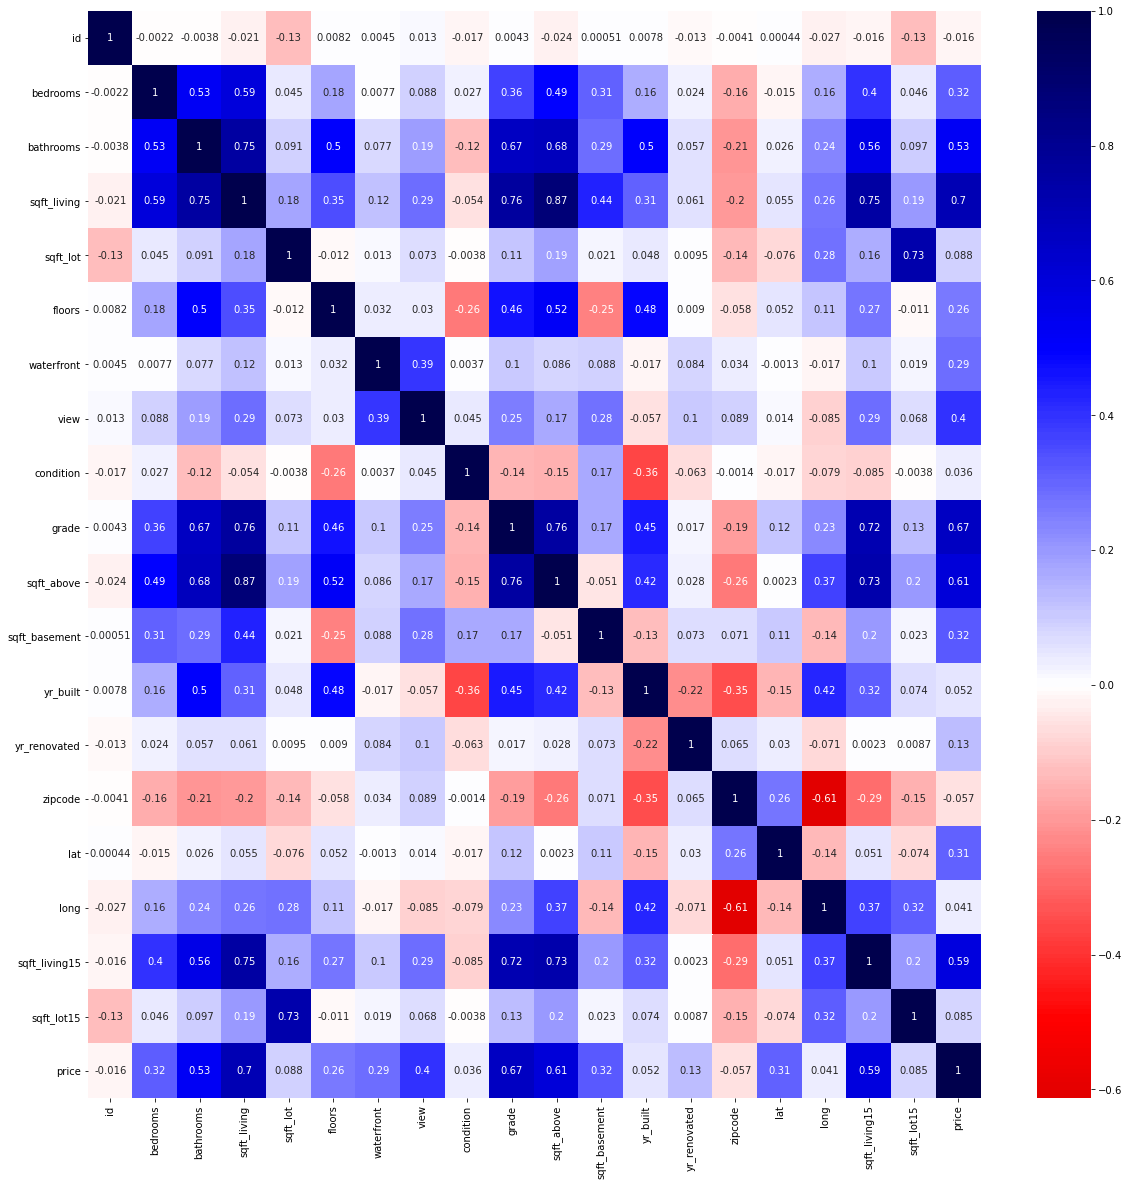

In [595]:
# Plot regular df corrlations matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix, 
            cmap='seismic_r', #add '_r' at the end to reverse color scheme
            center = 0,
            annot= True) 

In [596]:
# Check correlations of numerical values
corr_matrix = df_trimmed.corr()

<AxesSubplot:>

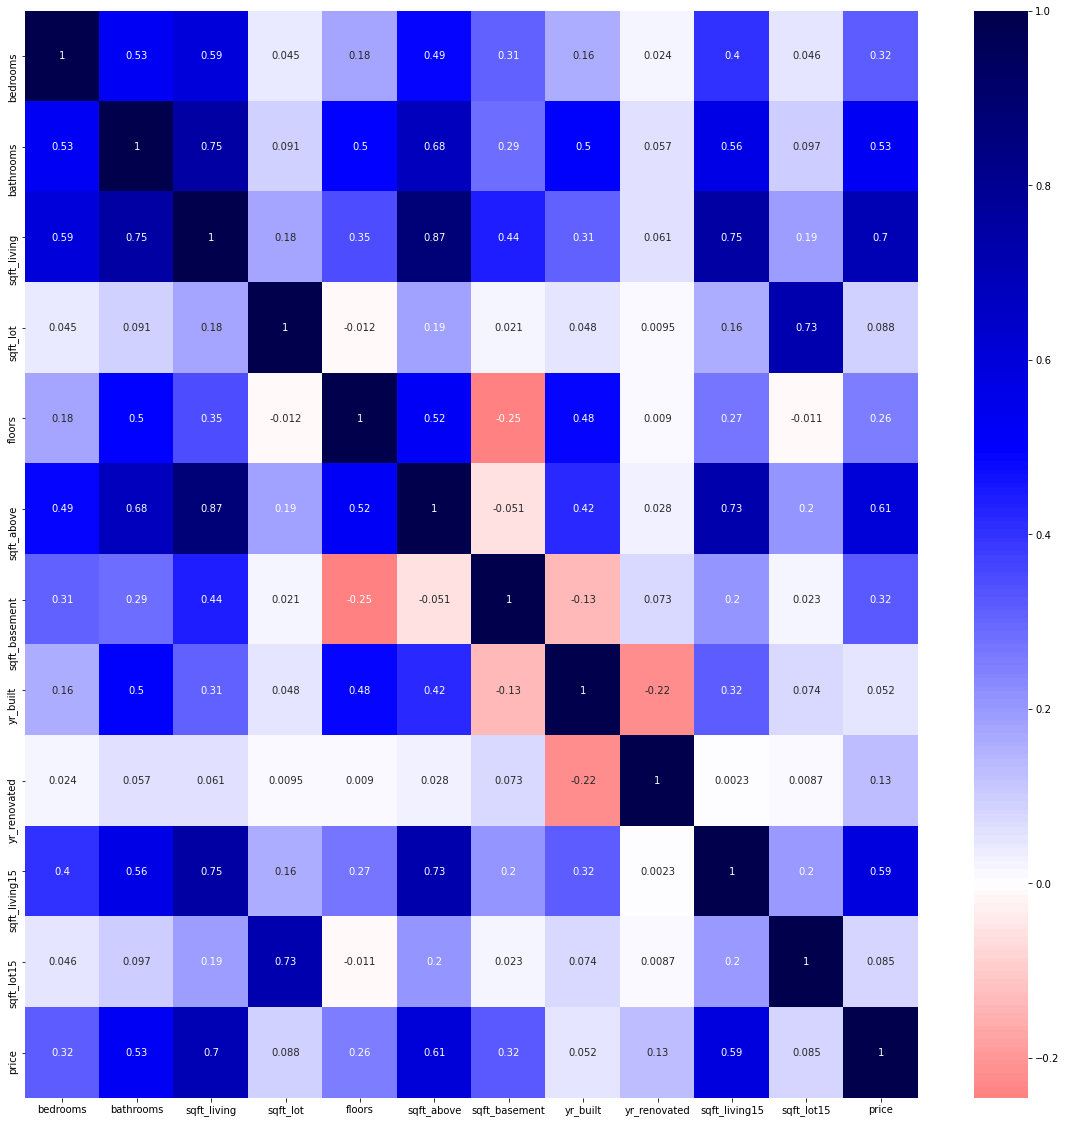

In [597]:
# Plot correlations matrix for GENERAL PROPERTY MARKET using heatmap
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix, 
            cmap='seismic_r', #add '_r' at the end to reverse color scheme
            center = 0,
            annot= True) 

### General observations
A number of variables seem to be correlated to price including:
* sq. ft living
* sq. ft living15
* sq. ft above

### Compare correlations in higher and lower price segments

In [598]:
# Create seperate df for higher priced and lower priced properties
higher_priced = df_trimmed[df_trimmed["price"] > 650000]
lower_priced = df_trimmed[df_trimmed["price"] < 650000]

In [599]:
# Create correlations matrices
corr_matrix_hp = higher_priced.corr()
corr_matrix_lp = lower_priced.corr()

<AxesSubplot:>

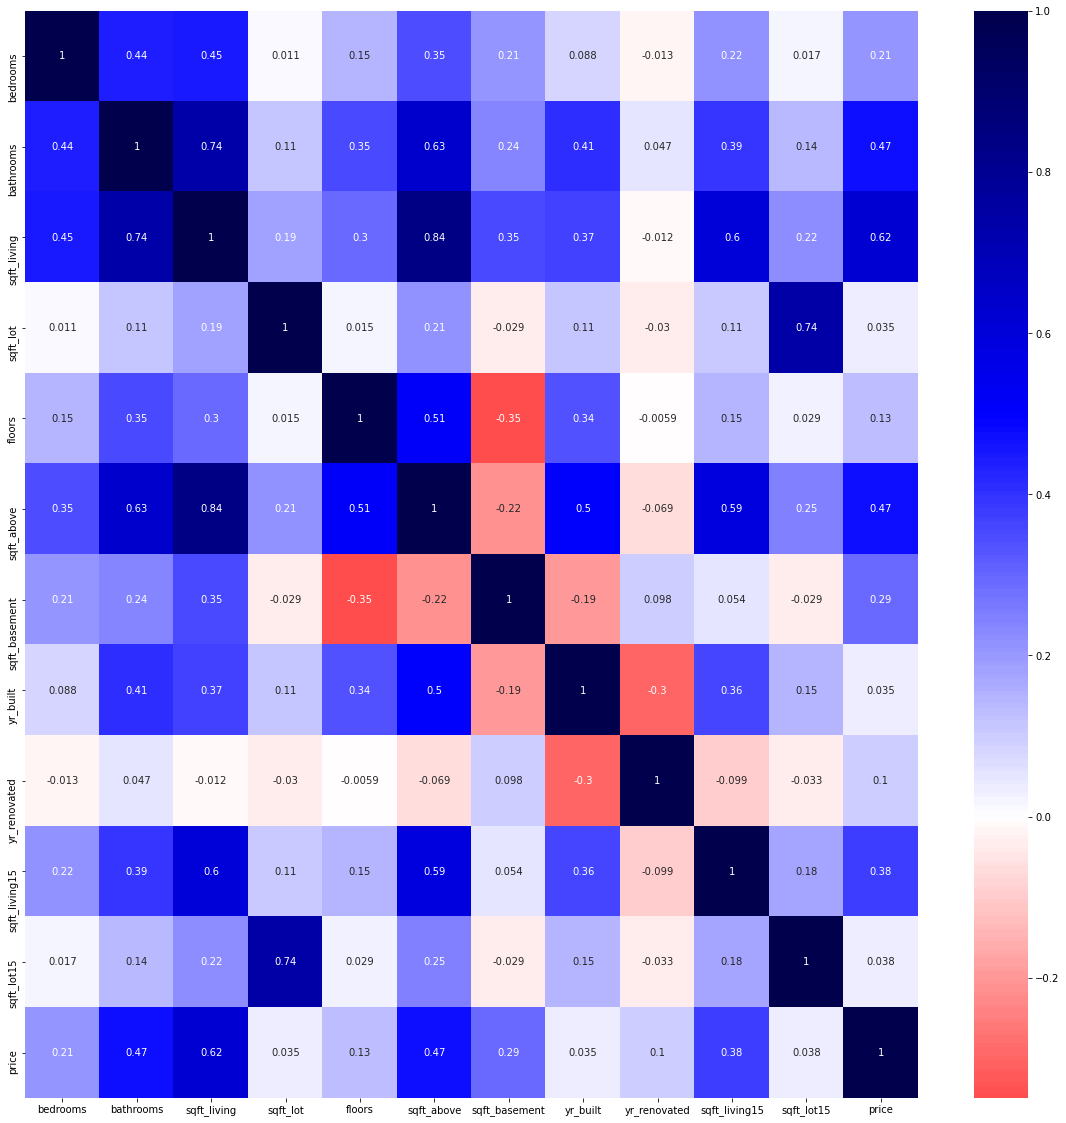

In [600]:
# Plot correlations matrix for HIGHER-PRICED segment
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix_hp, 
            cmap='seismic_r',
            center = 0,
            annot= True) 

<AxesSubplot:>

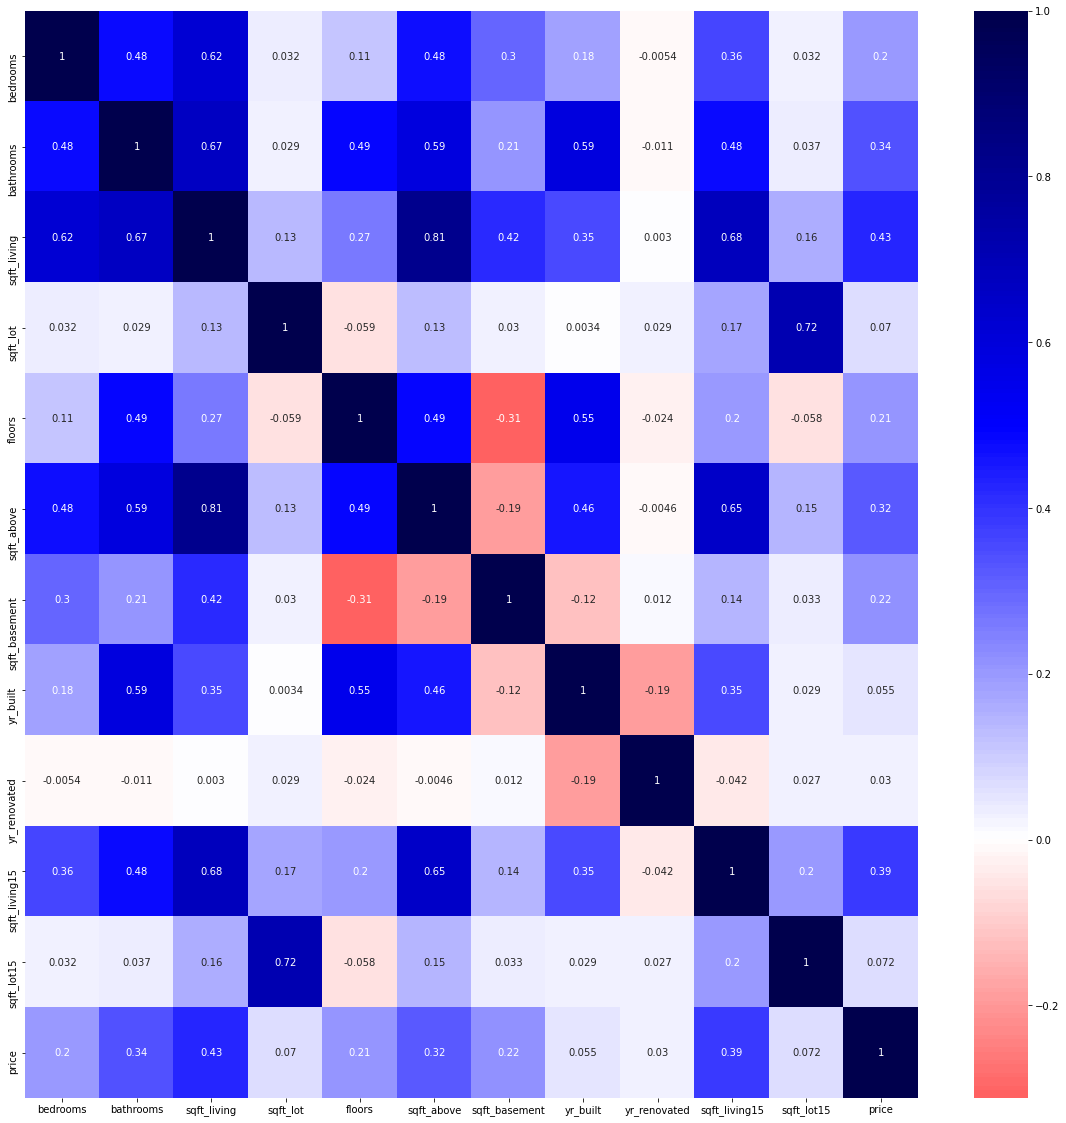

In [601]:
# Plot correlations matrix for LOWER-PRICED segment
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix_lp, 
            cmap='seismic_r',
            center = 0,
            annot= True) 

<AxesSubplot:>

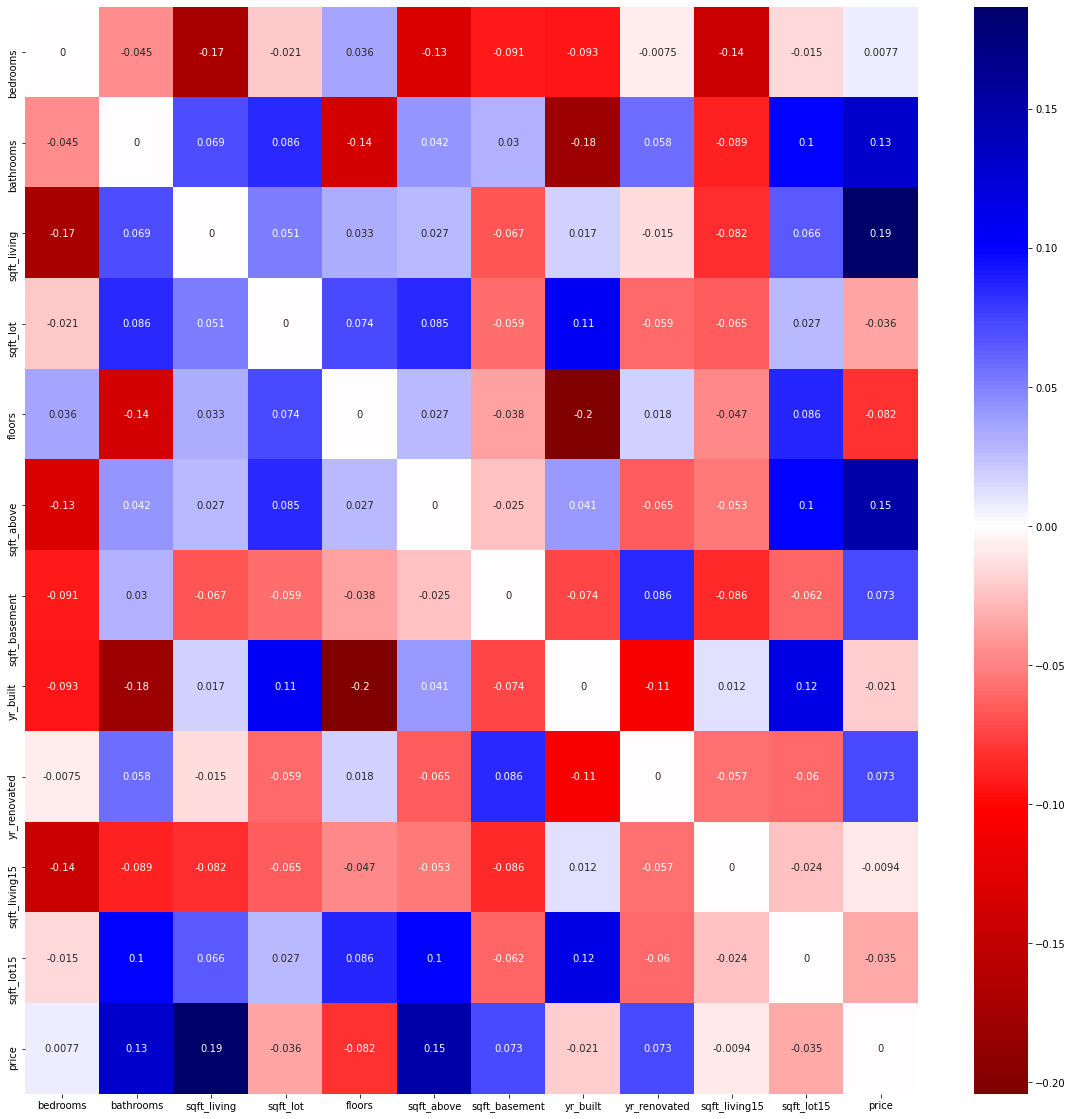

In [602]:
# View difference in correlation HIGH-PRICED VS. LOW-PRICED
# Each number indicates that the correlation in the high-priced property market is higher 
# (or lower if negative) than in the high-priced market by that number
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap((corr_matrix_hp-corr_matrix_lp), 
            cmap='seismic_r',
            center = 0,
            annot= True) 

Notes:
* When compared to the lower price segment, Sq. Ft. living, Sq. Ft. above and number of bathrooms seem to be more highly correlated to price

In [603]:
# Find differences in correlations between overall housing and higher_priced housing
difference = corr_matrix - corr_matrix_hp

<AxesSubplot:>

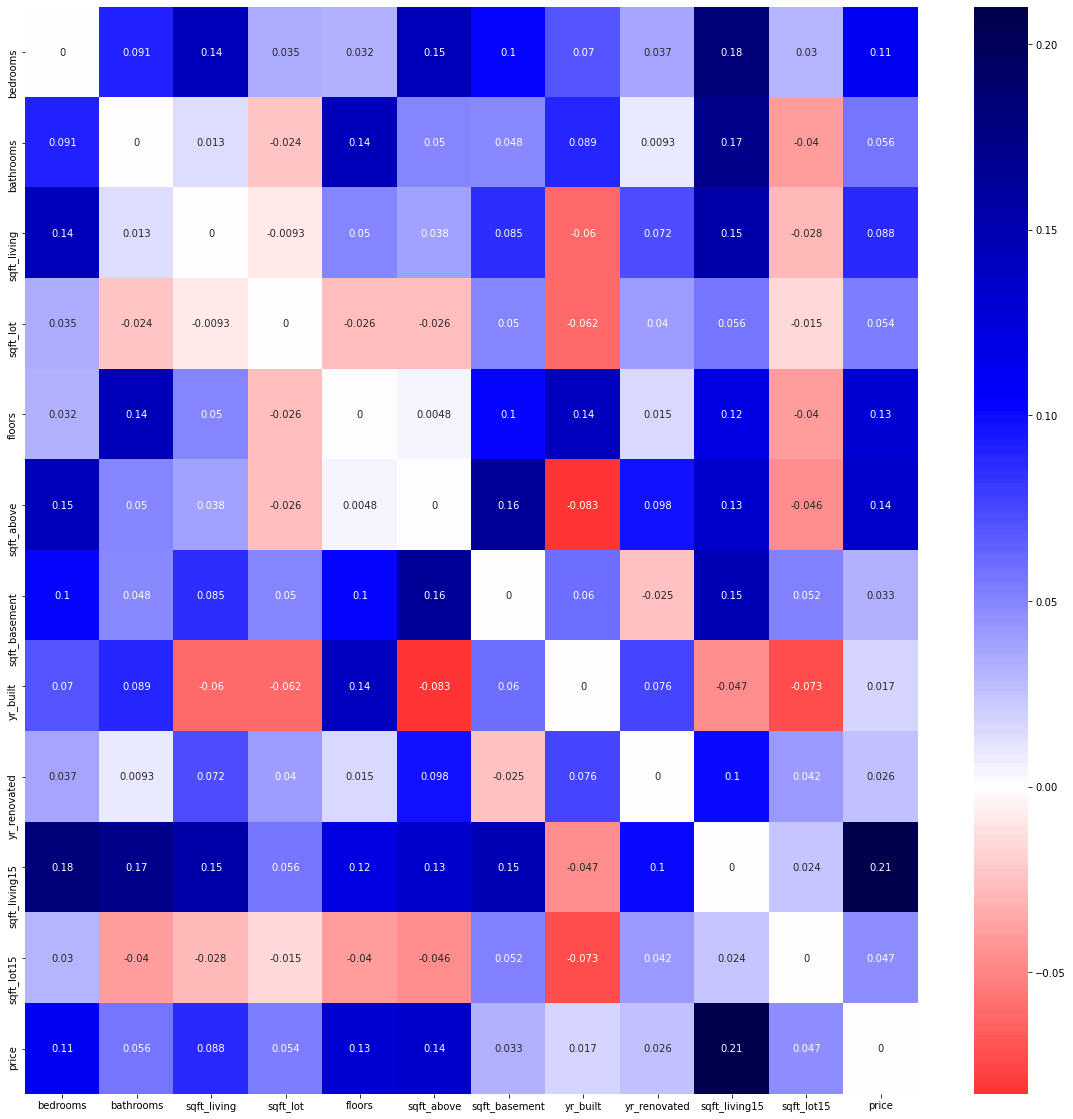

In [604]:
# View difference in correlation GENERAL PROPERTY MARKET VS. HIGH-PRICED:
# Each number indicates that the correlation in the general property market is higher (or lower) 
# than in the higher-priced market by that number
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(difference, 
            cmap='seismic_r',
            center = 0,
            annot= True) 

In [605]:
# Seperate and drop value to be predicted
y = df['price']
df.drop('price', axis= 1, inplace = True)

#### Get numerical values

In [606]:
# Get numericals for Model 1
numerical_m1 = df_m1.select_dtypes(include = np.number)
numerical_m2 = df_m2.select_dtypes(include = np.number)
numerical_m1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...
20929,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509,360000
20930,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200,400000
20931,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007,402101
20932,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287,400000


### Check for normal distribution

In [607]:
# Plot data
#sns.pairplot(numerical_m1, diag_kind='kde')

### Normalise data with normaliser

In [608]:
from sklearn.preprocessing import Normalizer

# Model 1
transformer_m1 =  Normalizer().fit(numerical_m1)
X_normalized_m1 = transformer.transform(numerical_m1)

# Model 2
transformer_m2 =  Normalizer().fit(numerical_m2)
X_normalized_m2 = transformer.transform(numerical_m2)

In [609]:
X_normalized_m1

array([[1.35096959e-05, 4.50323197e-06, 5.31381373e-03, ...,
        6.03433085e-03, 2.54432607e-02, 9.99267175e-01],
       [5.57492843e-06, 4.18119632e-06, 4.77585536e-03, ...,
        3.14054302e-03, 1.41956261e-02, 9.99770499e-01],
       [1.10808313e-05, 5.54041563e-06, 4.26612004e-03, ...,
        1.50699305e-02, 4.46668308e-02, 9.97274814e-01],
       ...,
       [4.97367466e-06, 1.86512800e-06, 2.53657408e-03, ...,
        2.53657408e-03, 4.99108252e-03, 9.99959777e-01],
       [7.49956684e-06, 6.24963903e-06, 3.99976898e-03, ...,
        3.52479642e-03, 3.21731417e-03, 9.99942245e-01],
       [6.15355043e-06, 2.30758141e-06, 3.13831072e-03, ...,
        3.13831072e-03, 4.17518396e-03, 9.99951944e-01]])

In [610]:
# Convert normalised data to dataframes
columns_m1 = numerical_m1.columns.to_list()
X_norm_m1 = pd.DataFrame(X_normalized, columns=columns_m1)

columns_m2 = numerical_m2.columns.to_list()
X_norm_m2 = pd.DataFrame(X_normalized, columns=columns_m2)

In [611]:
# Plot normalised data
#sns.pairplot(X_norm, diag_kind='kde')

## Rejoin numerical and categorical values

In [612]:
X_norm_m2.shape

(20934, 12)

In [613]:
categorical_m2.shape

(20934, 84)

In [614]:
# Model 1
X_m1 = np.concatenate((X_norm_m1, categorical_m1), axis=1)

# Model 2
X_m2 = np.concatenate((X_norm_m2, categorical_m2), axis=1)

## Run regression

In [615]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [619]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
20929    360000
20930    400000
20931    402101
20932    400000
20933    325000
Name: price, Length: 20934, dtype: int64

In [620]:
# Model 1
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y, test_size= 0.4, random_state=100) 

# Model 2
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y, test_size= 0.4, random_state=100) 

In [623]:
# Results from model where only zip code is 'categorical'
lm_m1 = linear_model.LinearRegression() # configure model
model_m1= lm_m1.fit(X_train_m1, y_train_m1) # train model
predictions = lm_m1.predict(X_test_m1) # set up prediction method
r2_score(y_test_m1, predictions) # calculate my accuracy

0.589441622462998

In [622]:
# Results from model where in addition to zip code ordinal data is 'categorical'
lm_m2 = linear_model.LinearRegression() # configure model
model_m2= lm_m2.fit(X_train_m2, y_train_m2) # train model
predictions = lm_m2.predict(X_test_m2) # set up prediction method
r2_score(y_test_m2, predictions) # calculate my accuracy

0.798707120563742